
# Multilayer Perceptron

In [1]:
from MLP import MLP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_dataset(filename: str) -> pd.DataFrame:
    '''Load and return the content of `filename` into a Pandas DataFrame'''
    
    
    return pd.read_csv(filename, delim_whitespace=True)

In [3]:
def split_dataset(dataset: pd.DataFrame) -> (list, list, list, list):
    '''Split the `dataset` into 4 lists: 2 for training and 2 to test the prediction'''
    
    
    labels_train = dataset.values[:,-1]
    training_samples = dataset.values[:,:-1]
    
    return training_samples, training_samples[:], labels_train, labels_train[:]

## First Example, the ```Xor``` case

#### Display the Dataset

In [4]:
dataset = load_dataset("datasets/xor.dat")
dataset.head()

,X,Y,Output
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


#### Plot of the Dataset

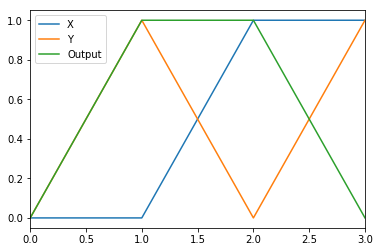

In [5]:
dataset.plot();

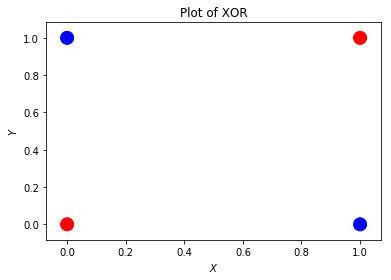

In [6]:
training_samples, testing_samples, labels_train, labels_test = split_dataset(dataset)

colors = ["red" if label == 0 else "blue" for label in labels_train]

plt.figure()
plt.scatter(training_samples[:, 0], training_samples[:, 1], s=170, color=colors)

plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.title("Plot of XOR")

plt.show()

In [7]:
clf = MLP(input_layer=2, hidden=2, output=1)
clf.fit(training_samples, labels_train)

In [8]:
pred = clf.predict(testing_samples)
print('Convergence: with MSE:{}'.format(clf.error))

Convergence: with MSE:0.009998743858270374


In [9]:
print(clf)

Hidden weights
[[-3.89401434  4.34361666  1.75951619]
 [-5.105452    5.51460481 -3.39395531]]
Output weights
[[-5.80042168  6.3255509   2.56022579]]


In [10]:
pd.DataFrame.from_items([('Expected', labels_test), ('Obtained', pred)])

,Expected,Obtained
0,0,0.101295
1,1,0.918399
2,1,0.875217
3,0,0.086119


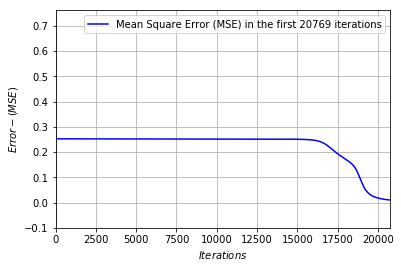

In [11]:
clf.plot_errors()

-------------------------------

#### :wq